In this notebook, we are interested in finding a correlation between geosmin and taste and odor. For this, we'll be utilizing the data generated by the `guandu_extract_and_clean` notebook.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

In [ ]:
csvdir = os.path.join('output', 'guandu')

We'll be using geosmin data with NETA and VETA separated, because then we can cross-check if taste and odor (which are also with separated NETA and VETA samples).

In [2]:
gm_df = pd.read_csv(os.path.join(csvdir, 'geosmin_2020-10-23_today.csv'), index_col='date')

In [3]:
gm_df.head()

,capture_geosmin,veta_geosmin,neta_geosmin,is_capture_geosmin_ub,is_veta_geosmin_ub,is_neta_geosmin_ub
date,,,,,,
2020-10-23,0.01,0.01,0.01,True,True,True
2020-10-24,0.01,0.01,0.01,True,True,True
2020-10-25,0.01,0.01,0.01,True,True,True
2020-10-26,0.01,0.01,0.01,True,True,True
2020-10-27,0.01,0.01,0.01,True,True,True


In [4]:
to_df = pd.read_csv(os.path.join(csvdir, 'taste_and_odor.csv'), index_col='date')

In [5]:
to_df.head()

,neta_taste,neta_odor,veta_taste,veta_odor,is_neta_taste_ub,is_neta_odor_ub,is_veta_taste_ub,is_veta_odor_ub
date,,,,,,,,
2020-01-29,17,3,67,4,False,False,False,False
2020-01-30,17,2,50,4,False,False,False,False
2020-01-31,12,2,25,2,False,False,False,False
2020-02-01,6,2,8,2,False,False,False,False
2020-02-03,4,2,8,2,False,False,False,False


We combine all data into these data frames to get taste and odor (2) versus geosmin for each (2) ETA (2x2=4 data frames).

In [46]:
dfs = {}

def get_non_ub_param(df, eta, param):
    return df[~df['is_{}_{}_ub'.format(eta, param)]]

def get_column_name(eta, param):
    return '{}_{}'.format(eta, param)

for eta in ('neta', 'veta'):
    for param1 in ('geosmin', ):
        col1 = get_column_name(eta, param1)
        df1 = get_non_ub_param(gm_df, eta, param1)
        for param2 in ('taste', 'odor'):
            col2 = get_column_name(eta, param2)
            df2 = get_non_ub_param(to_df, eta, param2)
            df = pd.concat((df1, df2), axis=1)
            df = df[[col1, col2]]
            df = df.dropna()
            key = (eta, param2)
            dfs[key] = df

We make a correlation matrix between taste, odor and geosmin.

In [59]:
correlations = {}

for key, df in dfs.items():
    eta, param = key
    col1 = get_column_name(eta, param)
    col2 = get_column_name(eta, 'geosmin')
    if eta not in correlations:
        correlations[eta] = {}
    correlations[eta][param] = df.corr()[col1][col2]

In [61]:
corr = pd.DataFrame(correlations)

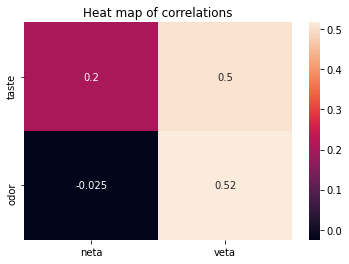

In [66]:
plt.figure()
plt.title('Heat map of correlations')
sn.heatmap(corr, annot=True)
plt.show()

We see that:
* geosmin, odor and taste don't correlate well on NETA
* geosmin, odor and taste correlate moderately well on VETA